<a href="https://www.kaggle.com/code/wngur0313/air-pollution-of-seoul?scriptVersionId=93049716" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:








# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_station_info.csv
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_item_info.csv
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_info.csv


In [2]:
df = pd.read_csv("../input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv")
df #df.head() 를 치면 5개만 보여줌 head() 안에 숫자를 입력하면 숫자 입력한만큼 보여줌

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


pd.read_csv = 저 데이터 csv 파일을 불러오는거

.head = 표를 보여주는거

몇년전부터 미세먼지에 관심이 많았어서 PM을 다뤄보자

In [3]:
PM10 = df['PM10']
PM10.head()

0    73.0
1    71.0
2    70.0
3    70.0
4    69.0
Name: PM10, dtype: float64

In [4]:
df_Month= df['Measurement date'].str.split("-",n=2,expand=True)
df['Year'] = df_Month[0]
df['Month'] = df_Month[1]

In [5]:
df_date= df_Month[2].str.split(" ",n=1,expand=True)
df['Date'] = df_date[0]

df말고 PM10에 위 두 코드들을 넣으면 이상해짐 그래서 밑에처럼 다 drop시켜서 했음

이유가 뭘까?

In [6]:
df = df.drop(['Measurement date'],axis = 1)
df = df.drop(['Station code'],axis = 1)
df = df.drop(['Latitude'],axis = 1)
df = df.drop(['Longitude'],axis = 1)
df = df.drop(['SO2'],axis = 1)
df = df.drop(['NO2'],axis = 1)
df = df.drop(['O3'],axis = 1)
df = df.drop(['CO'],axis = 1)
df

,Address,PM10,PM2.5,Year,Month,Date
0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",73.0,57.0,2017,01,01
1,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",71.0,59.0,2017,01,01
2,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",70.0,59.0,2017,01,01
3,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",70.0,58.0,2017,01,01
4,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",69.0,61.0,2017,01,01
...,...,...,...,...,...,...
647506,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",23.0,17.0,2019,12,31
647507,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",25.0,19.0,2019,12,31
647508,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",24.0,17.0,2019,12,31
647509,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",25.0,18.0,2019,12,31


Year, Month, Date를 앞쪽으로는 못땡겨오나?

In [7]:
df_PM10 = df.sort_values(by = ['PM10'], ascending = False)
df_PM10.head(100)

,Address,PM10,PM2.5,Year,Month,Date
397291,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",3586.0,23.0,2018,01,02
397290,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",3577.0,28.0,2018,01,02
397289,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",3568.0,23.0,2018,01,02
397288,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",3561.0,19.0,2018,01,02
397287,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",3556.0,16.0,2018,01,02
...,...,...,...,...,...,...
438761,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",1985.0,985.0,2019,10,28
437124,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",1985.0,8.0,2019,08,17
562800,"16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...",1985.0,54.0,2019,02,27
437079,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",1985.0,1.0,2019,08,15


In [8]:
con = (df.Year == '2019')
df_PM10 = df[con]
df_PM10.head(13)

,Address,PM10,PM2.5,Year,Month,Date
17520,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.0,22.0,2019,01,01
17521,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",38.0,21.0,2019,01,01
17522,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",36.0,23.0,2019,01,01
17523,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",41.0,26.0,2019,01,01
17524,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",41.0,25.0,2019,01,01
17525,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",38.0,27.0,2019,01,01
17526,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",35.0,23.0,2019,01,01
17527,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",40.0,25.0,2019,01,01
17528,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",38.0,25.0,2019,01,01
17529,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",30.0,20.0,2019,01,01


In [9]:
df_PM10.groupby('Month').Month.count()

Month
01    18575
02    16800
03    13058
04    17975
05    17425
06    18000
07    18075
08    18403
09    16300
10    18600
11    18000
12    18300
Name: Month, dtype: int64

In [10]:
df_PM10.PM10.mean()

45.03684293426121

In [11]:
df_PM2 = df.sort_values(by = ['PM2.5'], ascending = False)
df_PM2.head(100)

,Address,PM10,PM2.5,Year,Month,Date
62770,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",68.0,6256.0,2018,04,02
281354,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",33.0,995.0,2019,08,02
281426,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",985.0,995.0,2019,08,05
140880,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",77.0,985.0,2018,04,20
535694,"14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...",77.0,985.0,2019,01,08
...,...,...,...,...,...,...
331573,"34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...",7.0,985.0,2019,05,27
568561,"16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...",52.0,985.0,2019,11,09
331596,"34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...",38.0,985.0,2019,05,28
557927,"16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...",17.0,985.0,2018,08,08


In [12]:
e = df_PM10.groupby('Month').PM10.mean()
e = pd.DataFrame(e, columns = ['PM10'])
#df_PM10.loc[df_PM10.Month == '01'].mean()
e

,PM10
Month,
01,68.358762
02,60.326429
03,80.149870
04,43.647844
05,54.630416
06,32.438778
07,27.469267
08,34.198718
09,26.018405


In [13]:
df_PM10['Month']

17520     01
17521     01
17522     01
17523     01
17524     01
          ..
647506    12
647507    12
647508    12
647509    12
647510    12
Name: Month, Length: 209511, dtype: object

In [14]:
#X = df_PM10['Month']
X = df_PM10.groupby('Month').size()
Y = df_PM10.groupby('Month').PM10.mean()
X.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object', name='Month')

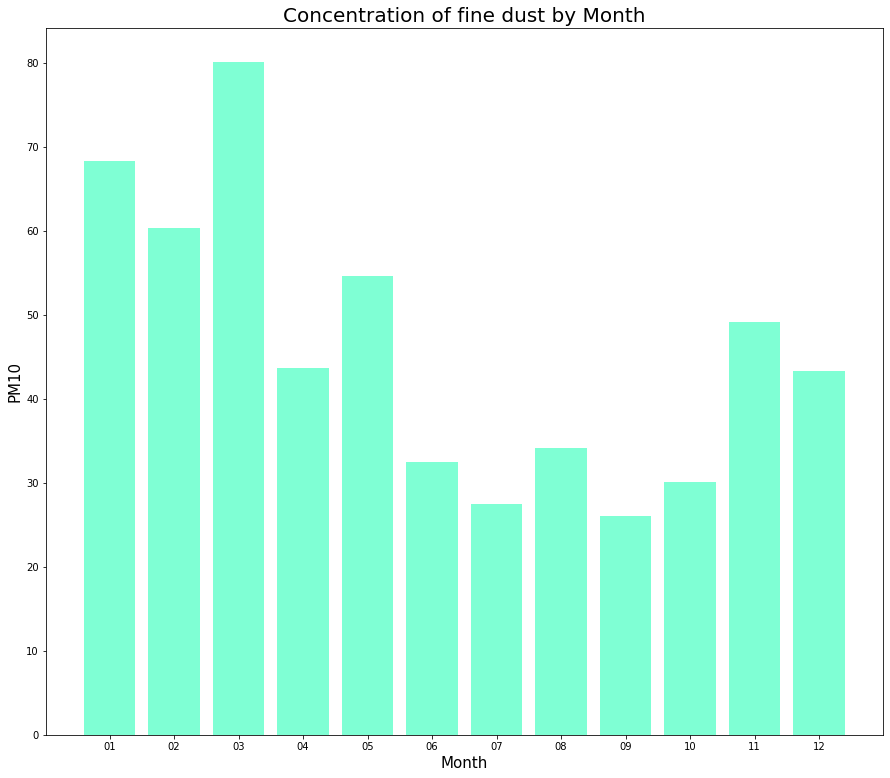

In [15]:
plt.figure(figsize = (15,13))
plt.bar(X.index,Y,color = 'aquamarine')
plt.title('Concentration of fine dust by Month',fontsize = 20)
plt.xlabel('Month',fontsize=15)
plt.ylabel('PM10',fontsize = 15)
plt.show()